In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy import stats

In [10]:
df = pd.read_csv('data/final_datasets/final_experiment_participants.csv')

[ 1  3  2  1  4 11  2  4 18 22 34]
[ 0  0  2  5  6 18 14  5 26 16 10]


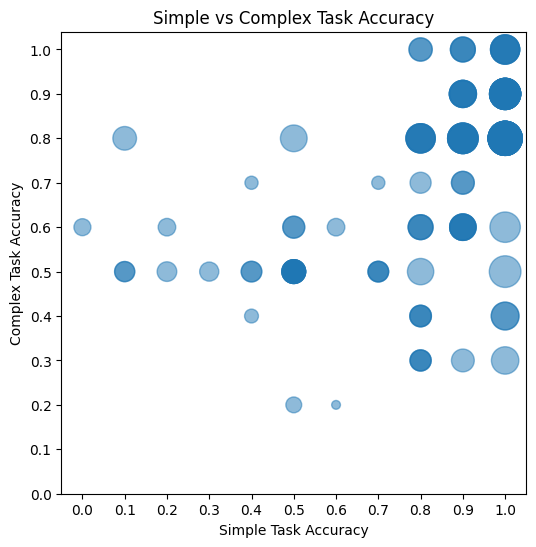

In [ ]:
plt.figure(figsize=(6, 6))
x = df['answerAccuracySimple']
x = np.array([round(i, 1) for i in x])
y = df['answerAccuracyComplex']
y = np.array([round(i, 1) for i in y])
sx = df['answerAccuracySimple'].value_counts()
sy = df['answerAccuracyComplex'].value_counts()
# move the counts to the closest value with 1 digit after the comma for sx
sx_rounded = np.array(11*[0])
for acc, count in sx.items():
    sx_rounded[int(round(acc,1)*10)] += count
sy_rounded = np.array(11*[0])
for acc, count in sy.items():
    sy_rounded[int(round(acc,1)*10)] += count
print(sx_rounded)
print(sy_rounded)
s = [(sx_rounded[int(round(i,1)*10)] + sy_rounded[int(round(j,1)*10)]) * 10 for i, j in zip(x, y)]
# scatter plot with increasing size of the dots based on the number of participants per accuracy value
plt.scatter(x, y, s=s, alpha=0.5)
plt.xlabel('Simple Task Accuracy')
plt.ylabel('Complex Task Accuracy')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Simple vs Complex Task Accuracy')
plt.show()

TypeError: Axes.annotate() missing 1 required positional argument: 'xy'

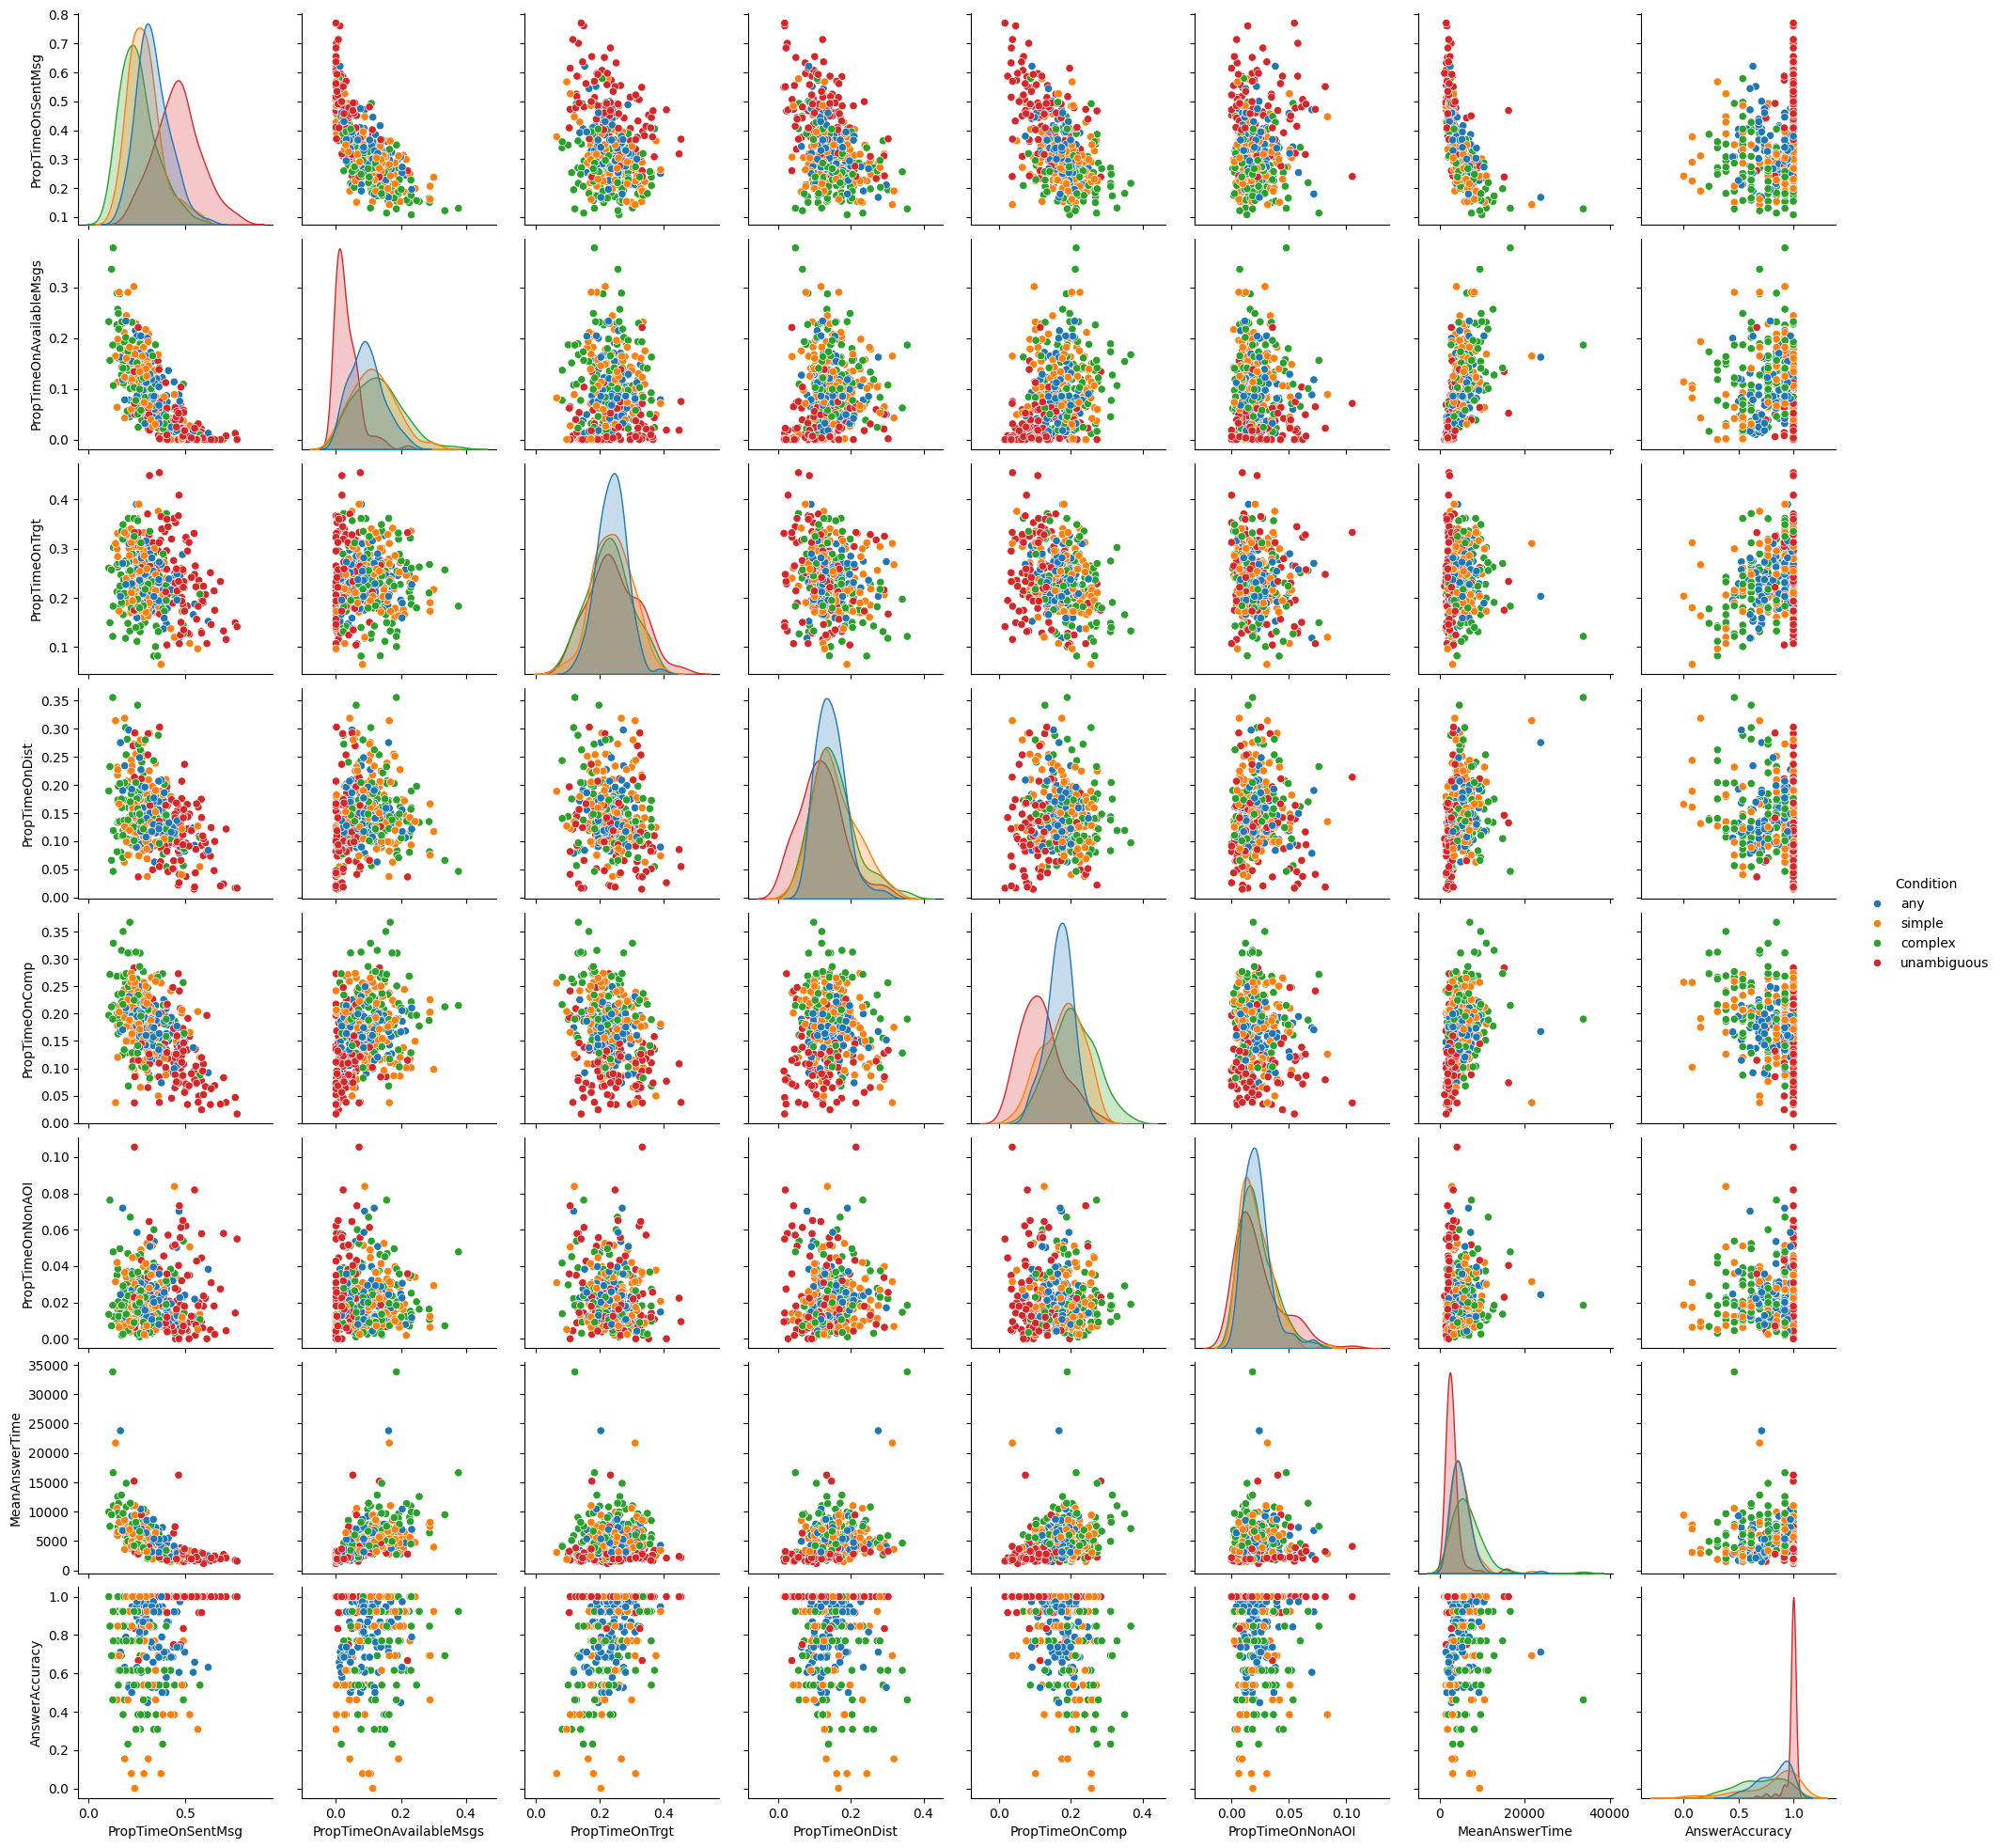

In [12]:
df = pd.read_csv('data/final_datasets/final_experiment_participants.csv')
df.drop("Subject", inplace=True, axis=1)
def corrfunc(x, y, **kws):
  r, p = stats.pearsonr(x, y)
  p_stars = ''
  if p <= 0.05:
    p_stars = '*'
  if p <= 0.01:
    p_stars = '**'
  if p <= 0.001:
    p_stars = '***'
  ax = plt.gca()
  ax.annotate('r = {:.2f} '.format(r) + p_stars, xycoords=ax.transAxes)

def annotate_colname(x, **kws):
  ax = plt.gca()
  ax.annotate(x.name, xy=(0.05, 0.9), xycoords=ax.transAxes,
              fontweight='bold')
  
def cor_matrix(df):
  g = sns.PairGrid(df, palette=['red'])
  # Use normal regplot as `lowess=True` doesn't provide CIs.
  g.map_upper(sns.regplot, scatter_kws={'s':10})
  g.map_diag(sns.histplot, kde=True, kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
  g.map_diag(annotate_colname)
  g.map_lower(sns.kdeplot, cmap='Blues_d')
  g.map_lower(corrfunc)
  # Remove axis labels, as they're in the diagonals.
  for ax in g.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')
  return g

# df = df[df['Condition'] == 'any']
pair_corr = sns.pairplot(df, hue='Condition')
pair_corr.map_upper(corrfunc)